# Task 05 : Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.

## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Data

In [2]:
df = pd.read_csv(r'D:\recommend\RTA DATASET (2).csv')

In [3]:
df.head()

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,18-30,Male,Above high school,Employee,1-2yr,Unknown,No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Not a Pedestrian,Moving Backward,2
1,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2
2,18-30,Male,Junior high school,Employee,1-2yr,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,Going straight,Not a Pedestrian,Changing lane to the left,1
3,18-30,Male,Junior high school,Employee,5-10yr,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Changing lane to the right,2
4,18-30,Male,Junior high school,Employee,2-5yr,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2


In [4]:
df.shape

(12316, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age_band_of_driver       12316 non-null  object
 1   Sex_of_driver            12316 non-null  object
 2   Educational_level        12316 non-null  object
 3   Vehicle_driver_relation  12316 non-null  object
 4   Driving_experience       12316 non-null  object
 5   Lanes_or_Medians         12316 non-null  object
 6   Types_of_Junction        12316 non-null  object
 7   Road_surface_type        12316 non-null  object
 8   Light_conditions         12316 non-null  object
 9   Weather_conditions       12316 non-null  object
 10  Type_of_collision        12316 non-null  object
 11  Vehicle_movement         12316 non-null  object
 12  Pedestrian_movement      12316 non-null  object
 13  Cause_of_accident        12316 non-null  object
 14  Accident_severity        12316 non-nul

In [6]:
df.describe()

,Accident_severity
count,12316.000000
mean,1.832819
std,0.406082
min,0.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,2.000000


In [7]:
df.columns

Index(['Age_band_of_driver', 'Sex_of_driver', 'Educational_level',
       'Vehicle_driver_relation', 'Driving_experience', 'Lanes_or_Medians',
       'Types_of_Junction', 'Road_surface_type', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision', 'Vehicle_movement',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [8]:
df.head()

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,18-30,Male,Above high school,Employee,1-2yr,Unknown,No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Not a Pedestrian,Moving Backward,2
1,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2
2,18-30,Male,Junior high school,Employee,1-2yr,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,Going straight,Not a Pedestrian,Changing lane to the left,1
3,18-30,Male,Junior high school,Employee,5-10yr,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Changing lane to the right,2
4,18-30,Male,Junior high school,Employee,2-5yr,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age_band_of_driver       12316 non-null  object
 1   Sex_of_driver            12316 non-null  object
 2   Educational_level        12316 non-null  object
 3   Vehicle_driver_relation  12316 non-null  object
 4   Driving_experience       12316 non-null  object
 5   Lanes_or_Medians         12316 non-null  object
 6   Types_of_Junction        12316 non-null  object
 7   Road_surface_type        12316 non-null  object
 8   Light_conditions         12316 non-null  object
 9   Weather_conditions       12316 non-null  object
 10  Type_of_collision        12316 non-null  object
 11  Vehicle_movement         12316 non-null  object
 12  Pedestrian_movement      12316 non-null  object
 13  Cause_of_accident        12316 non-null  object
 14  Accident_severity        12316 non-nul

# Exploratory Data Analysis

## Countplot for Categorical Variables

In [10]:
categorical_columns = df.drop(['Accident_severity'],axis=1)

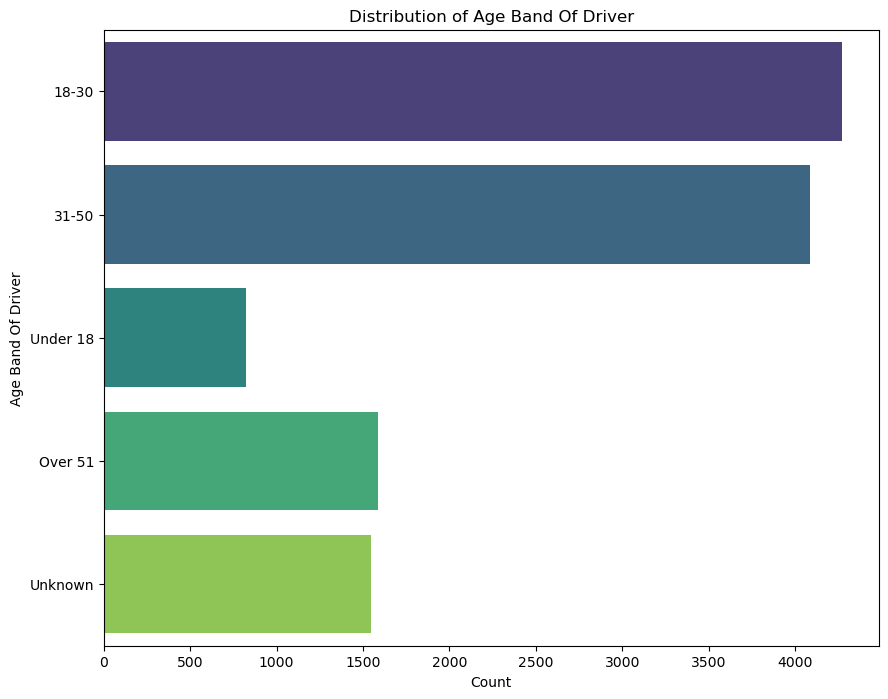

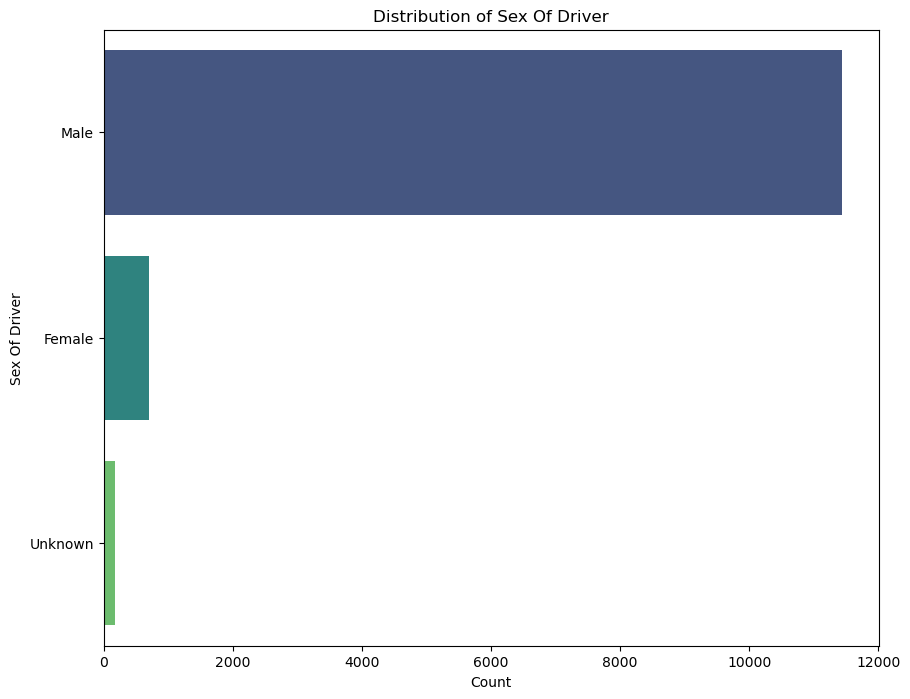

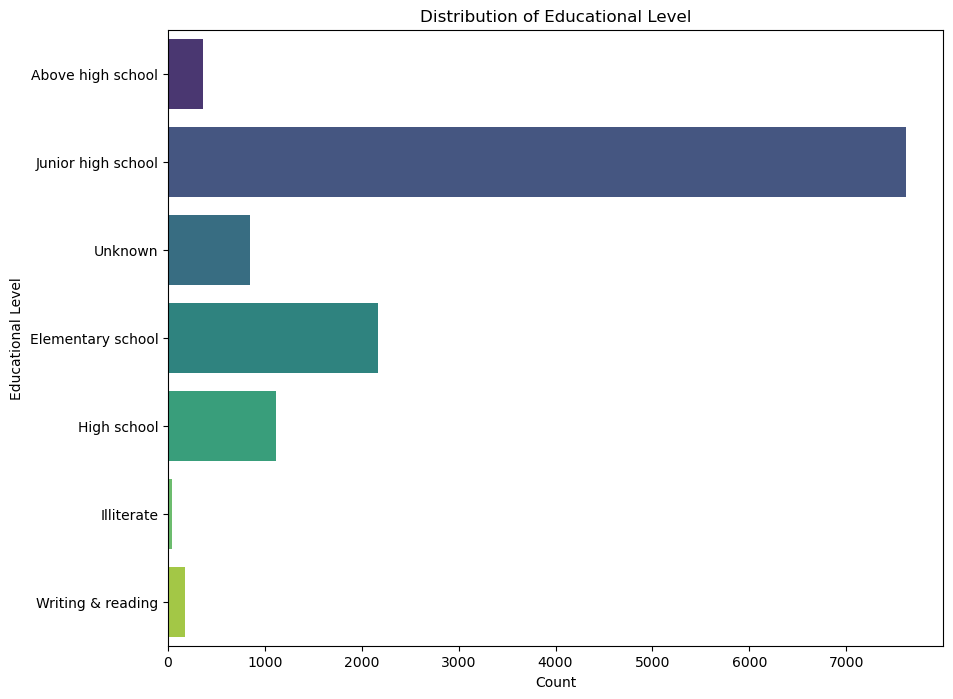

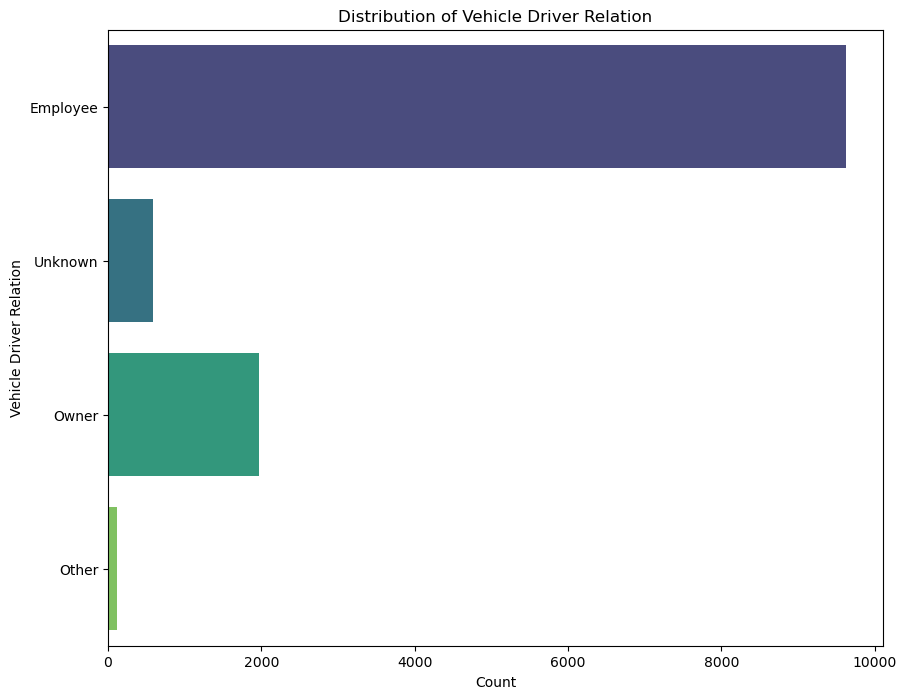

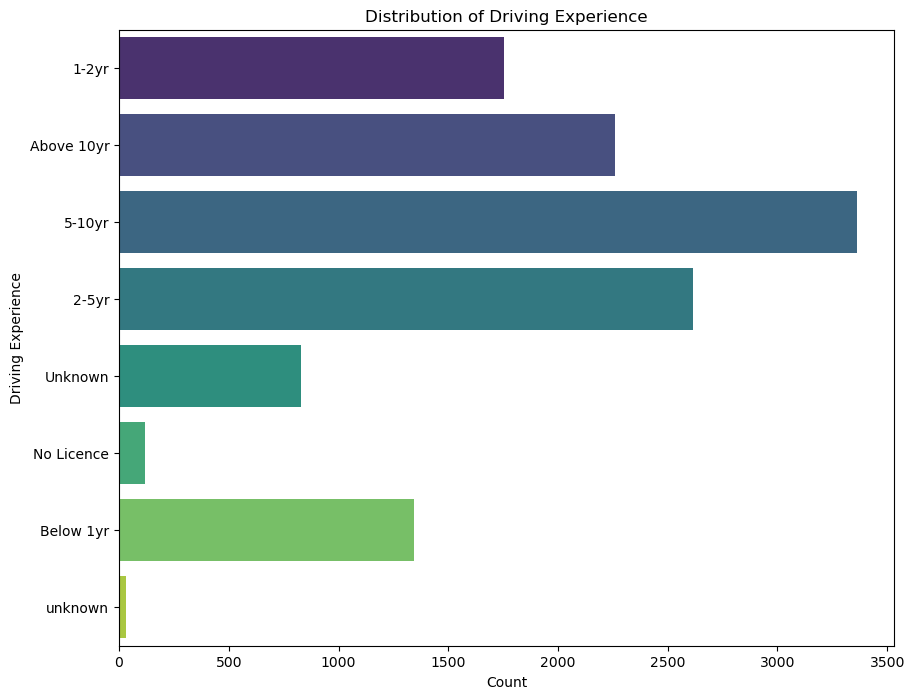

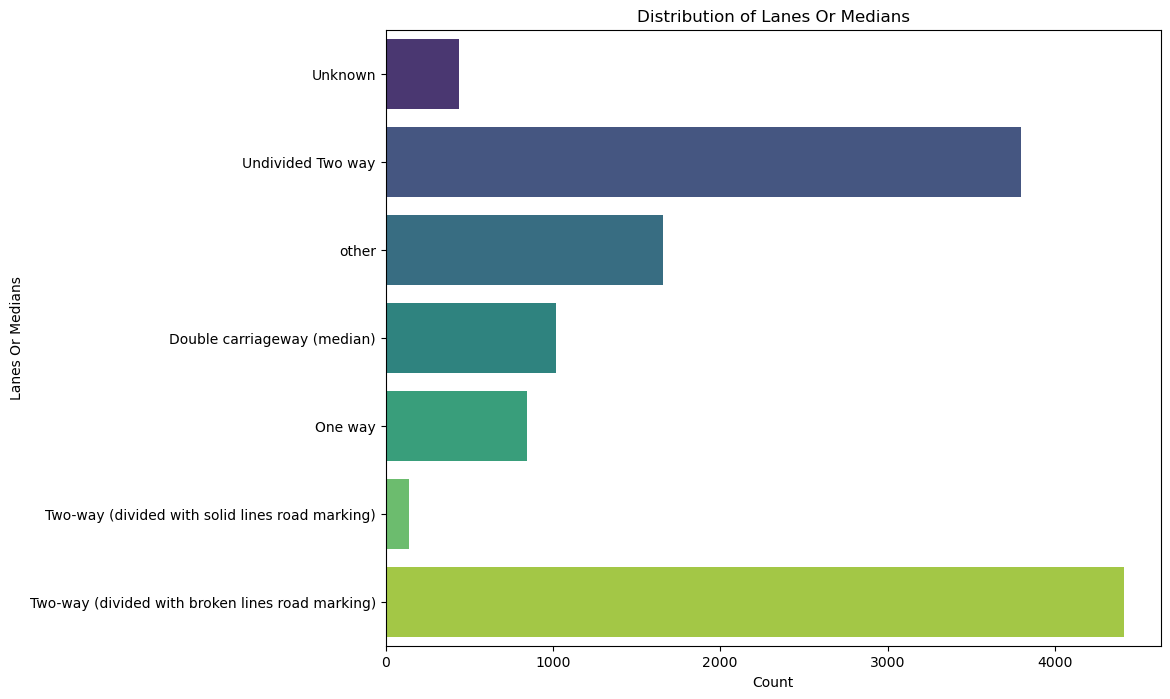

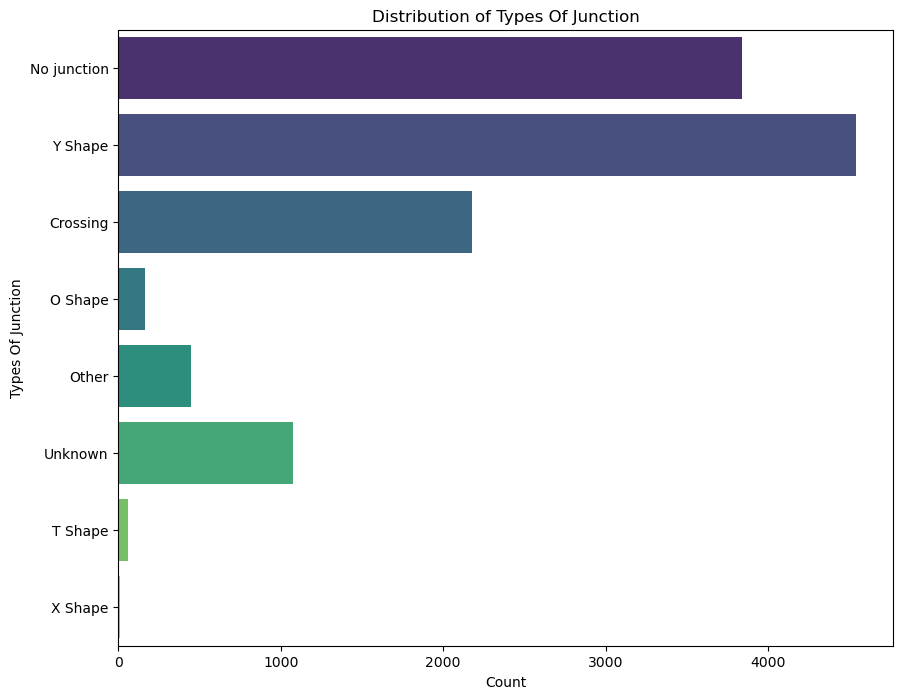

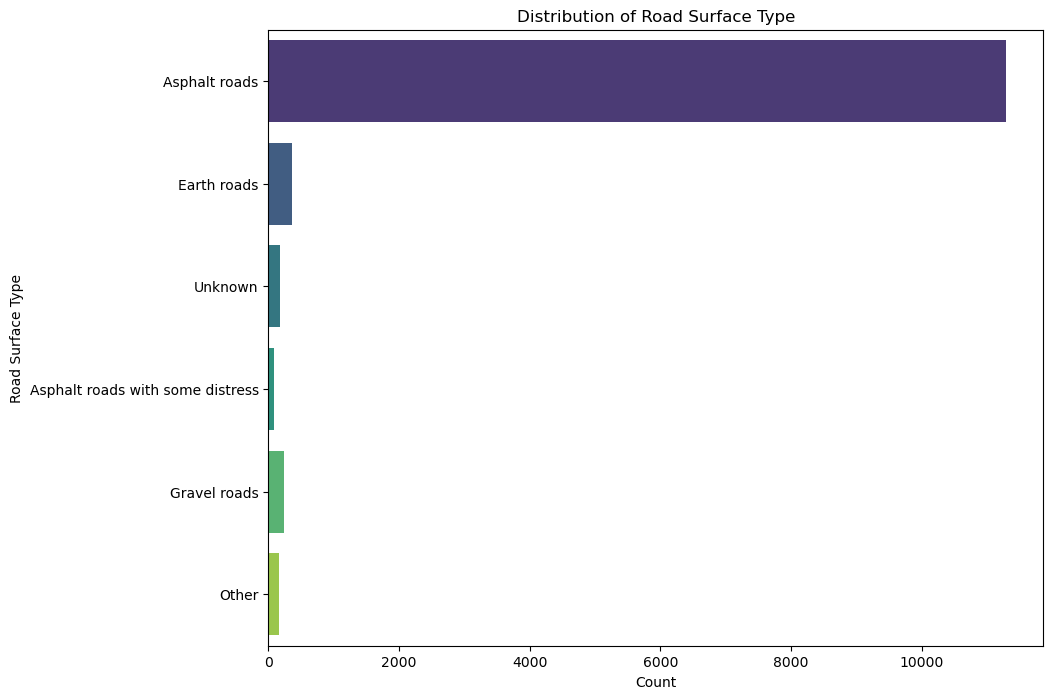

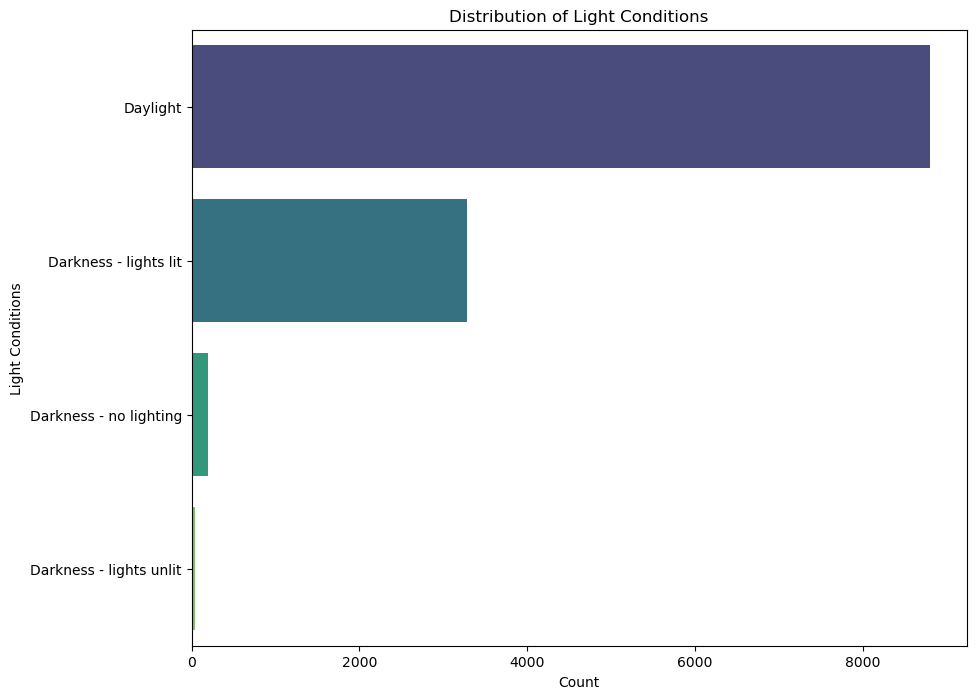

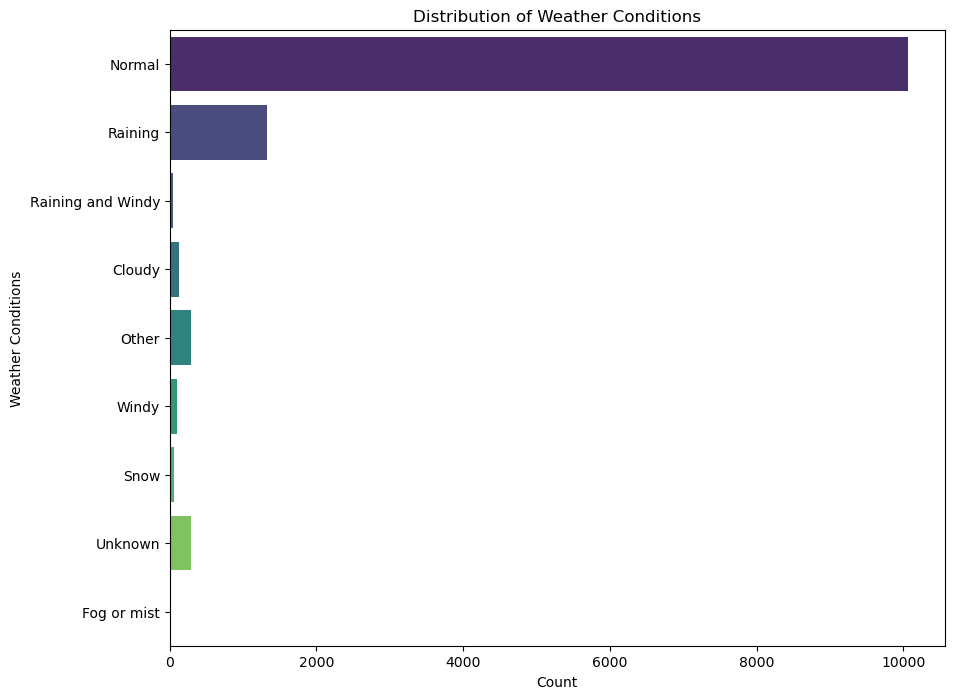

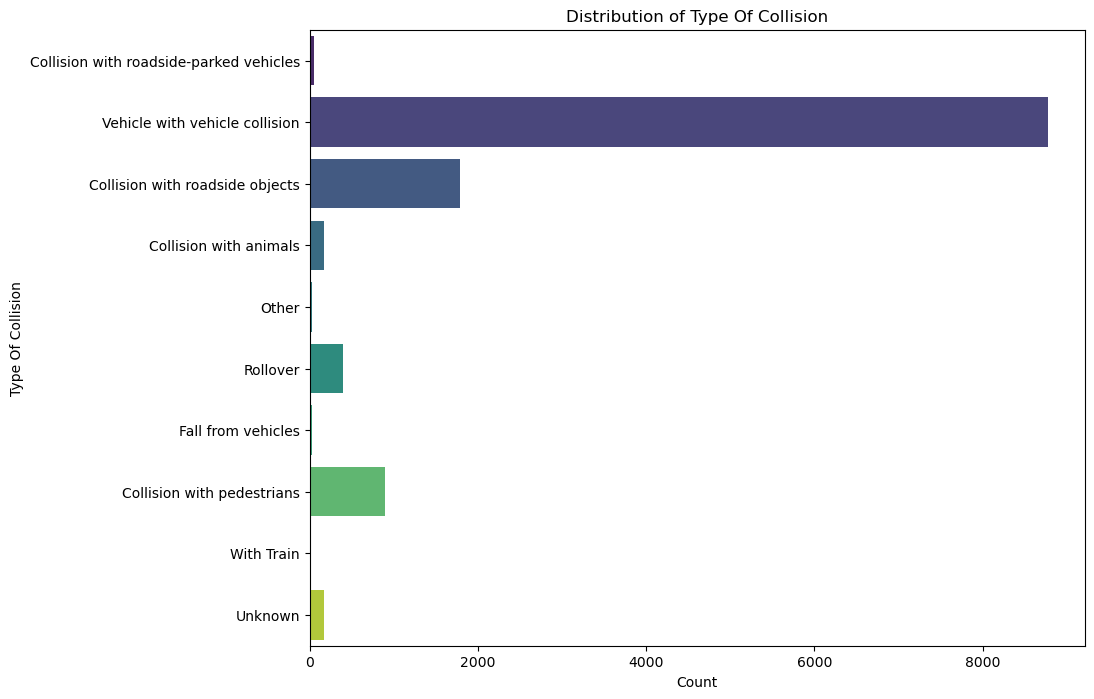

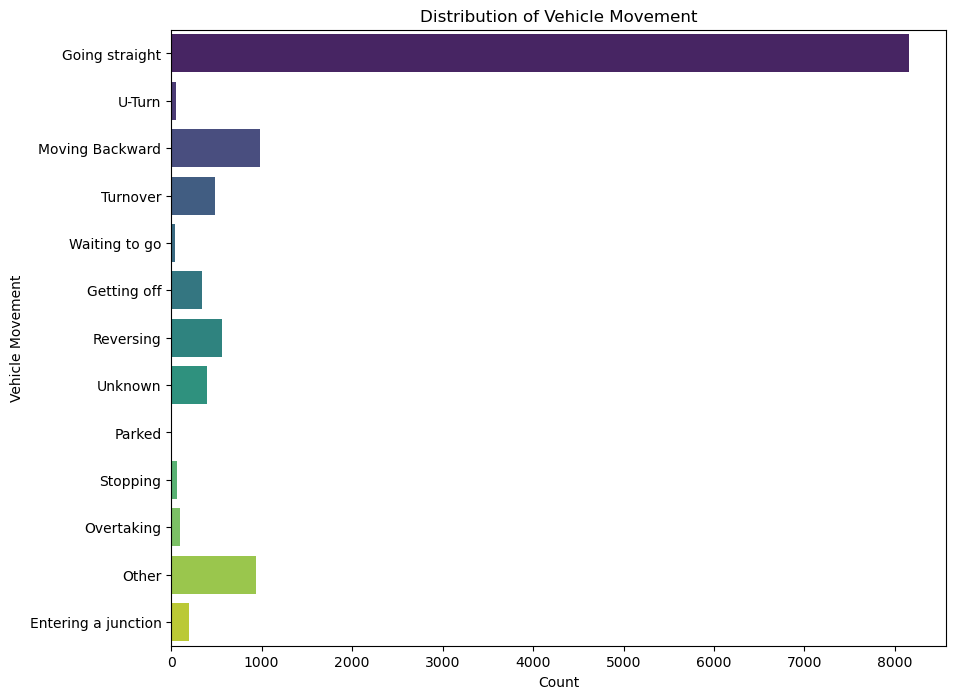

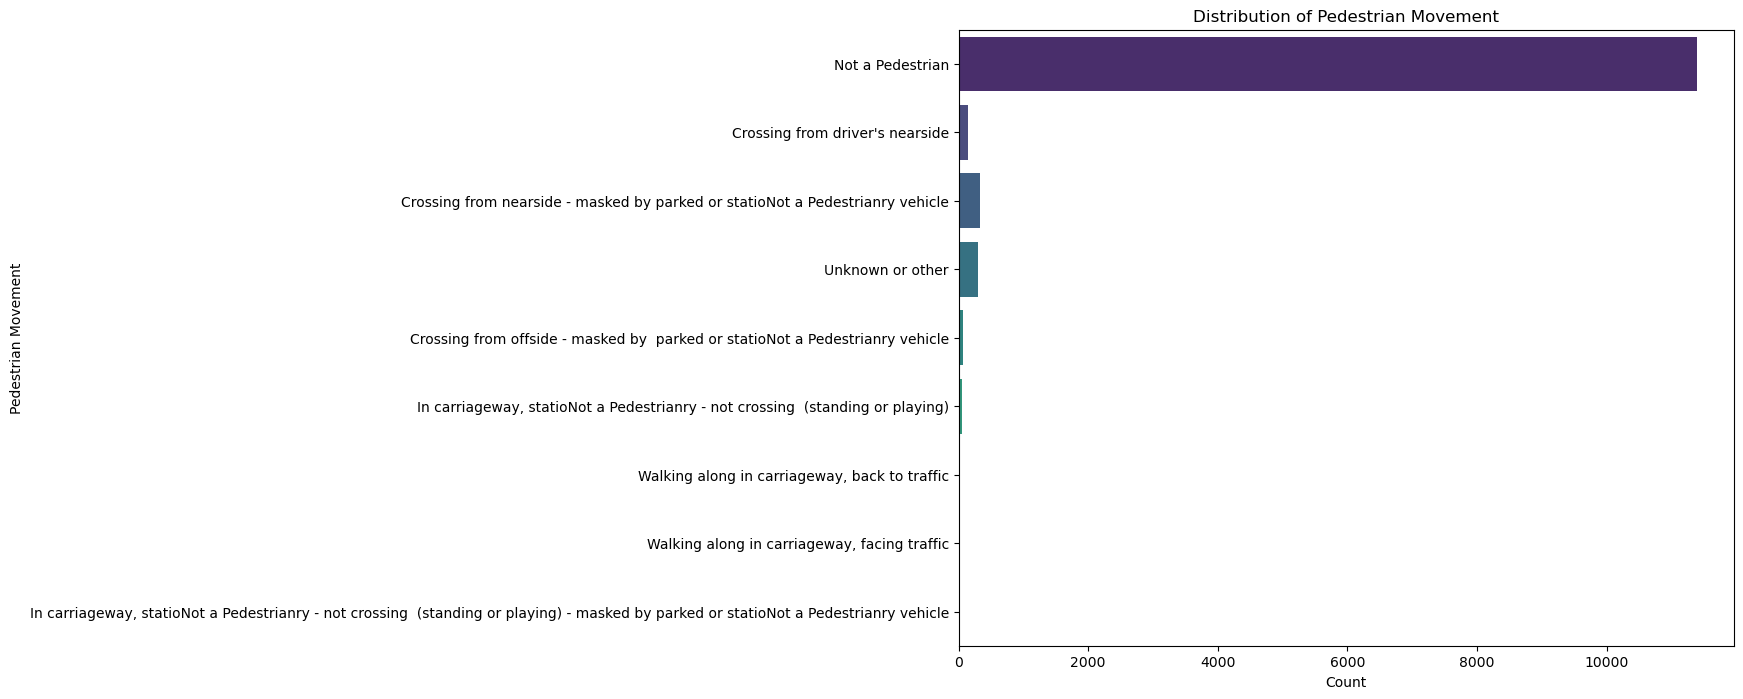

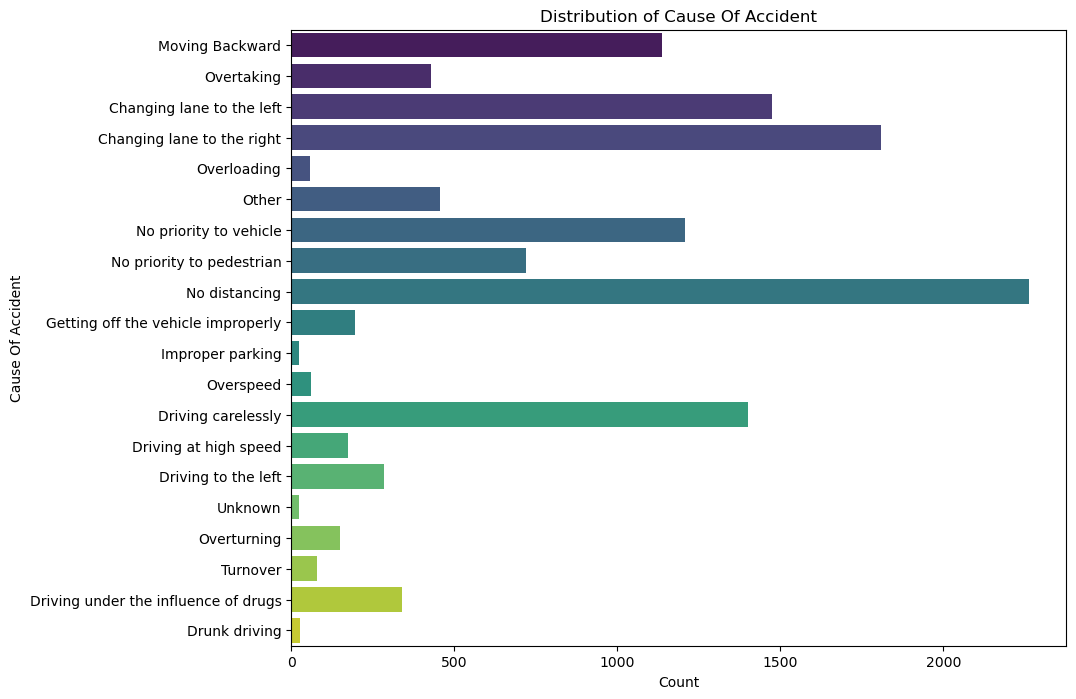

In [11]:
for column in categorical_columns:
    plt.figure(figsize=(10, 8))
    sns.countplot(y=column, data=df, palette='viridis')
    plt.title(f'Distribution of {column.replace("_", " ").title()}')
    plt.xlabel('Count')
    plt.ylabel(column.replace("_", " ").title())
    plt.show()

* The above countplots help to visualize the highest and lowest value counts of every category in various categorical variables which helps to understand the most occuring cause of accident, Age band distribution, impact of weather and light conditions, on the basis of driving experience and more information about other categories as well.

## Distribution of Accident_Severity

C:\Users\HELLO\AppData\Local\Temp\ipykernel_28244\3257405321.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Accident_severity"],color='blue')


<Axes: xlabel='Accident_severity', ylabel='Density'>

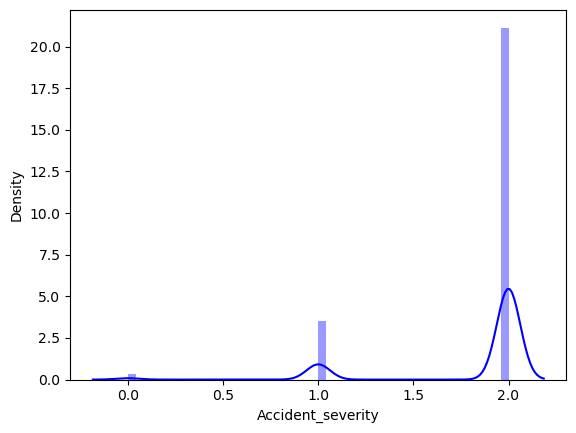

In [12]:
sns.distplot(df["Accident_severity"],color='blue')

* The distplot shows that most of the accidents caused were very severe with the accident severity being 2.0 and lowest number of accidents had a severity of 0.0.

## Relation between Accident_Severity and Cause of Accident

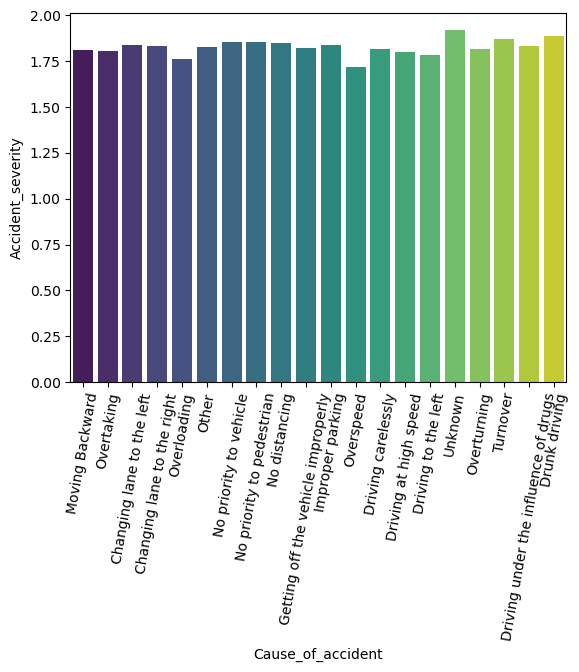

In [13]:
sns.barplot(data=df, x='Cause_of_accident', y='Accident_severity', palette='viridis', errorbar=('ci', 0))
plt.xticks(rotation=80)
plt.show()

* Barplot suggests that most causes of accidents are unknown followed by Drunk driving whereas Overspeed is the cause with least accident severity.

## Stacked Bar Plot of Accident Severity by Age Band

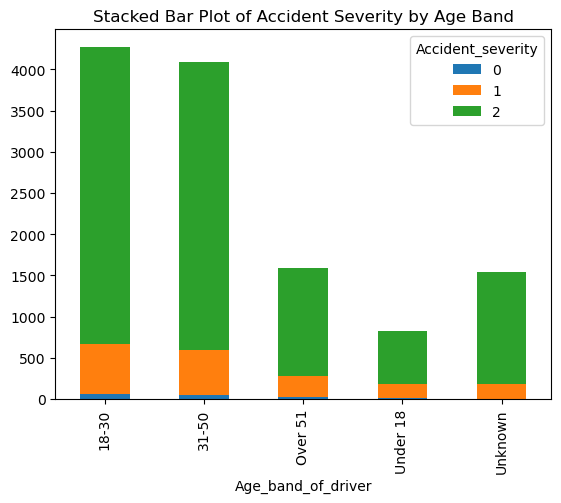

In [14]:
pd.crosstab(df['Age_band_of_driver'], df['Accident_severity']).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot of Accident Severity by Age Band')
plt.show()


* The Stacked bar plot shows the relation between age band and accident severity which suggests most of the accidents are occured by the age band of 18-30 which is foolowed by 31-50 years age band.

## Bar Plot of Accident Severity by Lanes_or_Medians

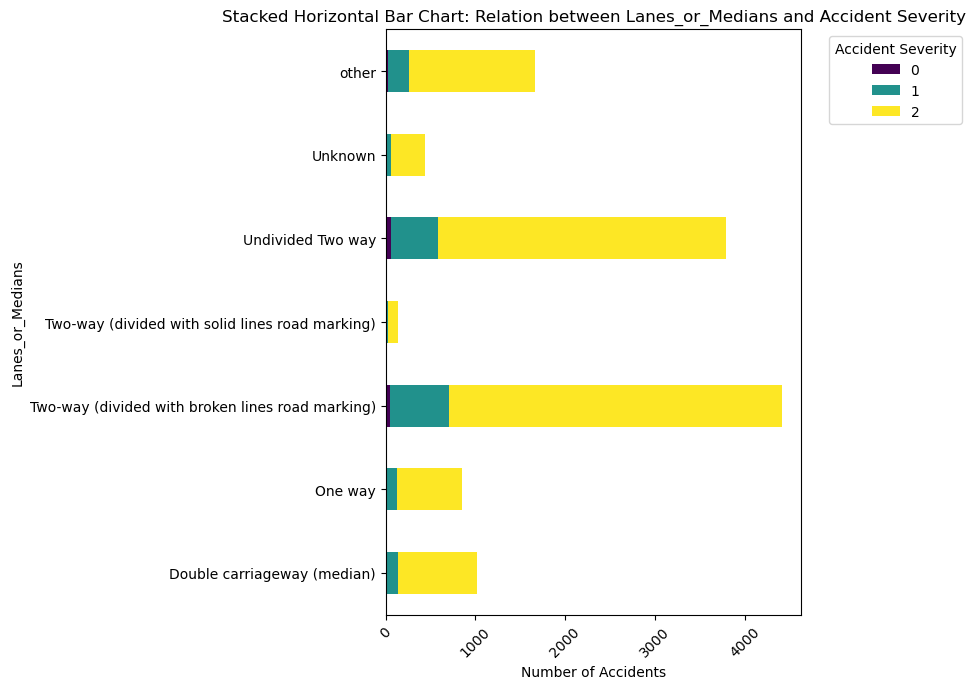

In [35]:
ct = pd.crosstab(df['Lanes_or_Medians'], df['Accident_severity'])
# Plotting the stacked horizontal bar chart
ct.plot(kind='barh', stacked=True, figsize=(10, 7), colormap='viridis')

# Adding titles and labels
plt.title('Stacked Horizontal Bar Chart: Relation between Lanes_or_Medians and Accident Severity')
plt.xlabel('Number of Accidents')
plt.ylabel('Lanes_or_Medians')
plt.legend(title='Accident Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
# Show plot
plt.show()


* To reduce the number of accidents, special attention should be given to improving the safety of "Two-way roads with broken lines road marking" and "Undivided Two-way roads." Implementing necessary measures for these types of roads could significantly decrease the accident rates.

## Relation between Driving experiecnce and Cause_of_accident  

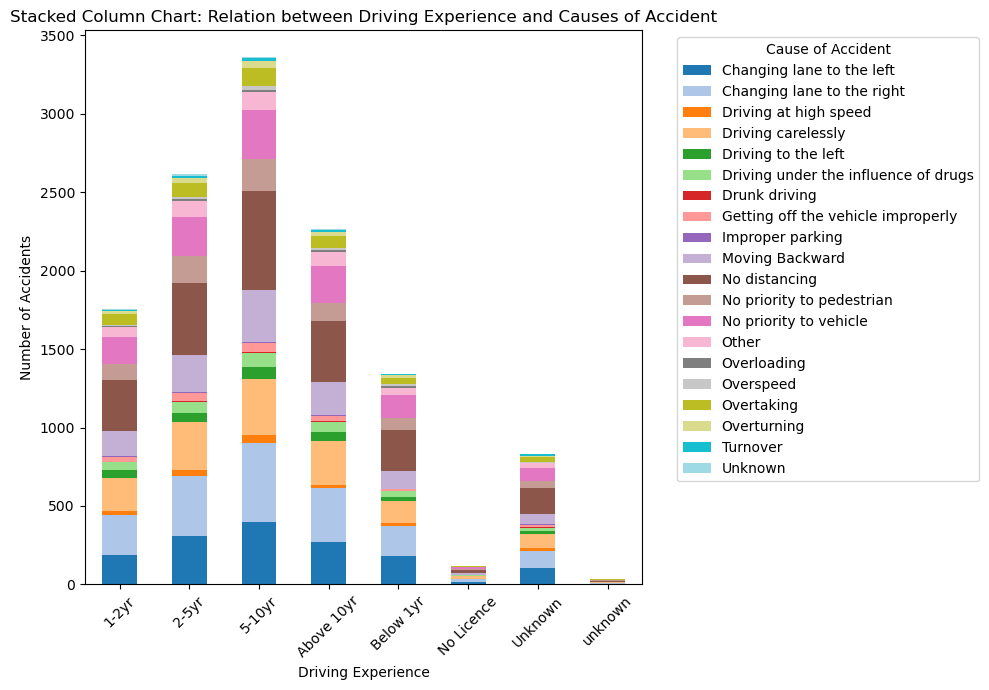

In [33]:

ct = pd.crosstab(df['Driving_experience'], df['Cause_of_accident'])

# Plotting the stacked bar chart
ct.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='tab20')

# Adding titles and labels
plt.title('Stacked Column Chart: Relation between Driving Experience and Causes of Accident')
plt.xlabel('Driving Experience')
plt.ylabel('Number of Accidents')
plt.legend(title='Cause of Accident', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


* This chart suggests that more accidents are caused by people with 5-10 years of driving experience and the major reason is no distancing and changing the lane to the right. Overall it can be seen that no distancing is a major problem causing accidents followed by changing the lane to right

<h1><center> --Project Ends Here-- </center></h1>